In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Read in data
accounts = pd.read_csv("../Resources/accounts.csv")
gpa = pd.read_csv("../Resources/group_product_associations.csv")

## 1) Generate a bar chart visualizing the relative frequency of Products registered with Accounts.

In [11]:
# Rename columns
gpa = gpa.rename(columns={"id":"gpa_id"})
accounts = accounts.rename(columns={"id":"accounts_df_id"})

In [12]:
# Merge accounts and gpa data frames
group_id_merge = gpa.merge(accounts, how="inner",on="group_id")
group_id_merge.head()

,gpa_id,group_id,product_id,accounts_df_id,organization_id,registration_date,is_written_off,is_unlocked
0,1,1,42,2,10001,2019-11-06 05:49:39.571392,False,True
1,1,1,42,3,10001,2019-11-14 14:57:02.571392,False,False
2,1,1,42,4,10001,2019-12-11 03:18:53.571392,False,True
3,1,1,42,5,10001,2019-10-31 22:36:23.571392,False,False
4,1,1,42,6,10001,2019-09-29 13:04:45.571392,False,True


In [13]:
# Use value_counts() on product_id column
df_product_registration = pd.DataFrame(group_id_merge['product_id'].value_counts())

# Reset index and order by product_id (named 'index')
df_product_registration = df_product_registration.reset_index().sort_values('index')

# Rename columns
df_product_registration = df_product_registration.rename(columns={"index":"product_id","product_id":"registration_count"})

# Reset index
df_product_registration = df_product_registration.reset_index(drop=True)
df_product_registration.head()

,product_id,registration_count
0,1,21
1,2,11
2,3,11
3,4,21
4,5,11


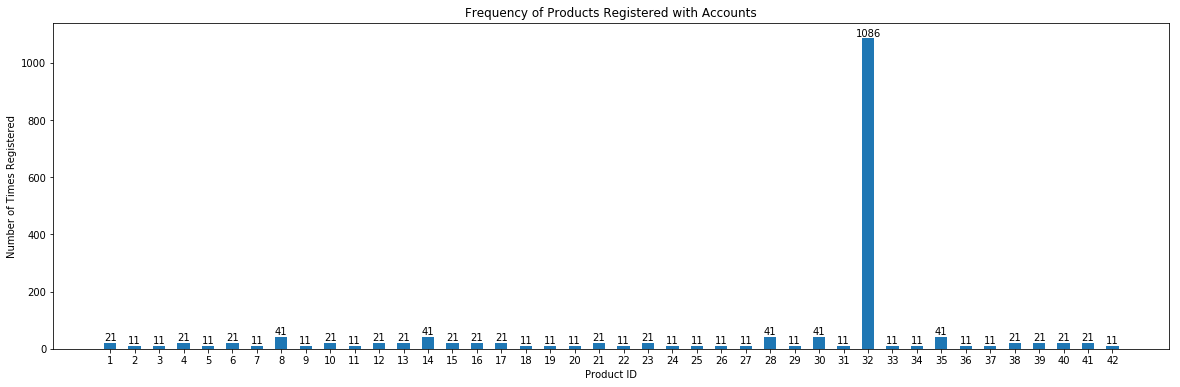

In [17]:
# Make bar chart with product_id on x-axis, and registration_count on y-axis

# Set x and y values
x_values = df_product_registration['product_id'].tolist()
y_values = df_product_registration['registration_count'].tolist()

# Format plot
plt.figure(figsize=(20, 6))
registration_rect = plt.bar(x_values, y_values, width=0.5)
plt.title("Frequency of Products Registered with Accounts")
plt.xlabel("Product ID")
plt.xticks(x_values)
plt.ylabel("Number of Times Registered")

# Create function to label bars
def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.5, height,
                ha='center', va='bottom', color="black")

# Call function
label_bars(registration_rect)

# Save figure
plt.savefig("../Output/product_registration1.png")

# Show figure
plt.show()

In [19]:
# Drop outliers
del x_values[31]
del y_values[31]

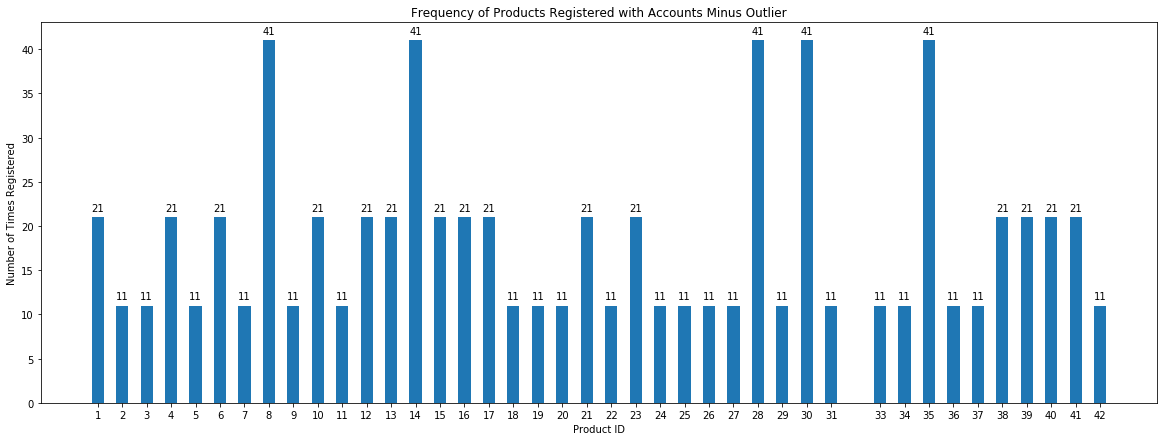

In [20]:
# Make bar chart excluding outlier: Product_ID 32 with  1086 count of registrations

# Format plot
plt.figure(figsize=(20, 7))
registration_rect2 = plt.bar(x_values, y_values, width=0.5)
plt.title("Frequency of Products Registered with Accounts Minus Outlier")
plt.xlabel("Product ID")
plt.xticks(x_values)
plt.ylabel("Number of Times Registered")

# Call labeling function
label_bars(registration_rect2)

# Save figure
plt.savefig("../Output/product_registration2.png")

# Show figure
plt.show()

## 4) Devise a method of generating a table of all Accounts with their “nominal” expected payments as of any arbitrary timestamp in the past. In other words, we’re looking for the amount the distributor would have collected as of the test date assuming the client had paid the minimum payment instantaneously upon going to a “disabled” state until reaching the unlock price.